In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from inspect import signature
import numpy as np
from joblib import dump, load
import pickle

In [13]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [14]:
data = data[data['TotalCharges']!=' ']

In [15]:
data = data.astype({'TotalCharges': 'float64'})
obj_columns = list(data.select_dtypes(['object']).columns)
obj_columns.remove('customerID')


In [16]:
for i in obj_columns:
    data[i] = data[i].astype('category')

In [17]:
mappings = {}
for i in obj_columns:
    mapList = list(data[i].cat.categories)
    mapping = {k: v for v, k in enumerate(mapList)}
    mappings[i] = mapping
    

with open('mappings.pkl', 'wb') as fp:
    pickle.dump(mappings, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
data[obj_columns] = data[obj_columns].apply(lambda x: x.cat.codes)

In [19]:
test =  pd.DataFrame()
for target_val in data['Churn'].unique():
    testSample = data[data.Churn==target_val].sample(frac=0.25,replace=False)
    test = pd.concat([test,testSample])
train = data[~data.customerID.isin(test.customerID)]

In [20]:
test.to_csv('testset.csv')

In [21]:
inputVars = list(data.columns)
inputVars.remove('Churn')
inputVars.remove('customerID')

In [22]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [23]:
clf.fit(train[inputVars], train.Churn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
preds = clf.predict_proba(test[inputVars])

(0.0, 1.0)

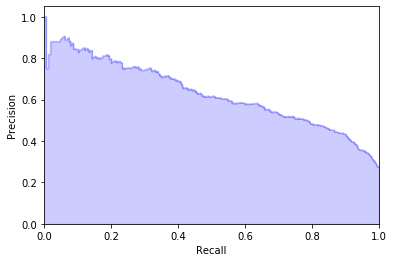

In [25]:
precision, recall, _ = precision_recall_curve(test.Churn, preds[:,1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [26]:
f1 = 2*precision*recall/(precision+recall)

maxf1 = max(f1)

In [27]:
argmaxf1 = np.argmax(f1)

In [28]:
maxprecision = precision[argmaxf1]
maxrecall = recall[argmaxf1]

In [29]:
print(maxprecision)
print(maxrecall)
print(maxf1)

0.5070028011204482
0.7751605995717344


NameError: name 'maxf1' is not defined

## TODO: Make a thorough search of hyperparameters and other classifiers ie SVMs...

In [30]:
dump(clf, 'simpleRF.clf') 

['simpleRF.clf']

In [33]:
set(inputVars) - set(['gender',
'Partner',
'Dependents',
'PhoneService',
'MultipleLines',
'InternetService',
'OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies',
'Contract',
'PaperlessBilling',
'PaymentMethod',
'TotalCharges'])

{'MonthlyCharges', 'SeniorCitizen', 'tenure'}